In [1]:
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df[train_df["keyword"] == "ablaze"][:10]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0


### Exploratory Data Analysis

In [6]:
# default parameter setting
plt.rcParams['figure.figsize'] = [5,3]
plt.rcParams['figure.dpi'] = 120

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Real and Non-real disaster tweets')

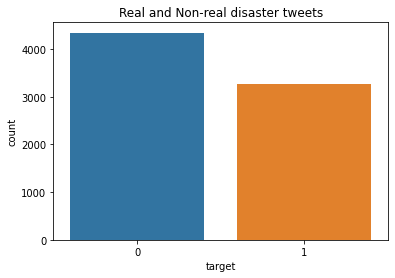

In [7]:
# Target class distribution
sns.countplot('target', data=train_df)
plt.title("Real and Non-real disaster tweets")

<AxesSubplot:ylabel='target'>

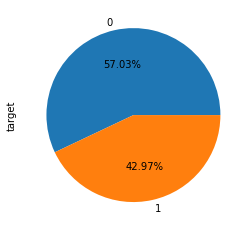

In [8]:
train_df["target"].value_counts().plot.pie(autopct='%1.2f%%')

### Basic feature extraction using external package

In [391]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /private/var/folders/fg/rbnh6s990114df6hzsrg0mhc0000gn/T/pip-req-build-eii29c2x
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /private/var/folders/fg/rbnh6s990114df6hzsrg0mhc0000gn/T/pip-req-build-eii29c2x
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7641 sha256=cdc8396949c9c21aaa3c4479bf0209923fadf3e3d60091a2b938a1578b452690
  Stored in directory: /private/var/folders/fg/rbnh6s990114df6hzsrg0mhc0000gn/T/pip-ephem-wheel-cache-2ago990_/wheels/d1/c3/bb/559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie


In [393]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 KB 5.1 MB/s eta 0:00:0000:0100:01


In [395]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
from preprocess_kgptalkie import get_basic_features

train_df2 = get_basic_features(train_df)

In [10]:
train_df2.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='char_counts', ylabel='Density'>

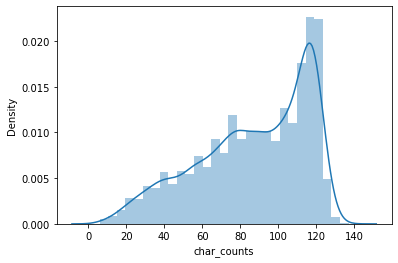

In [11]:
sns.distplot(train_df2['char_counts'])

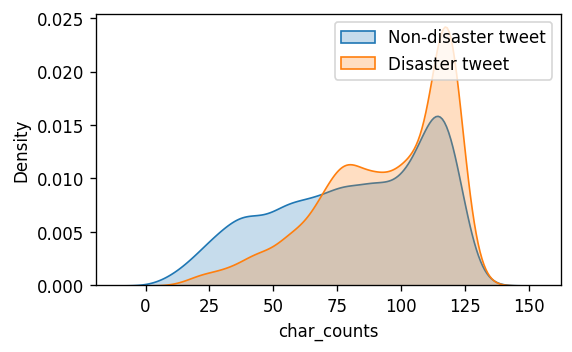

In [469]:
sns.kdeplot(train_df2[train_df2['target']==0]['char_counts'], shade=True, label='Non-disaster tweet')
sns.kdeplot(train_df2[train_df2['target']==1]['char_counts'], shade=True, label='Disaster tweet')
plt.legend()

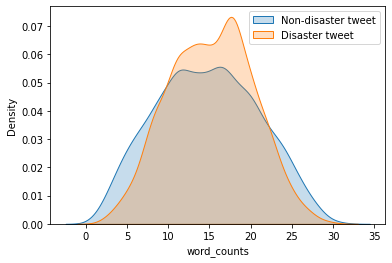

In [12]:
sns.kdeplot(train_df2[train_df2['target']==0]['word_counts'], shade=True, label='Non-disaster tweet')
sns.kdeplot(train_df2[train_df2['target']==1]['word_counts'], shade=True, label='Disaster tweet')
plt.legend()

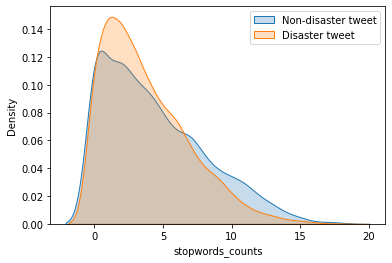

In [13]:
sns.kdeplot(train_df2[train_df2['target']==0]['stopwords_counts'], shade=True, label='Non-disaster tweet')
sns.kdeplot(train_df2[train_df2['target']==1]['stopwords_counts'], shade=True, label='Disaster tweet')
plt.legend()

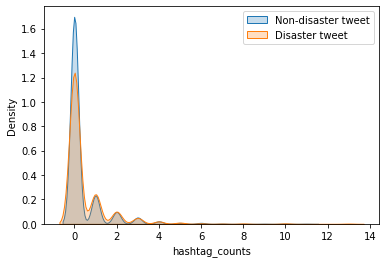

In [14]:
sns.kdeplot(train_df2[train_df2['target']==0]['hashtag_counts'], shade=True, label='Non-disaster tweet')
sns.kdeplot(train_df2[train_df2['target']==1]['hashtag_counts'], shade=True, label='Disaster tweet')
plt.legend()

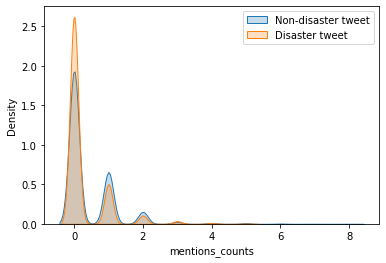

In [15]:
sns.kdeplot(train_df2[train_df2['target']==0]['mentions_counts'], shade=True, label='Non-disaster tweet')
sns.kdeplot(train_df2[train_df2['target']==1]['mentions_counts'], shade=True, label='Disaster tweet')
plt.legend()

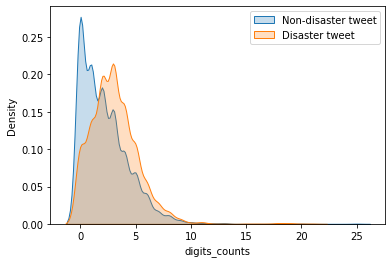

In [16]:
sns.kdeplot(train_df2[train_df2['target']==0]['digits_counts'], shade=True, label='Non-disaster tweet')
sns.kdeplot(train_df2[train_df2['target']==1]['digits_counts'], shade=True, label='Disaster tweet')
plt.legend()

### Text pre-processing

In [17]:
class TextPreprocessing():
    
    def __init__(self):
        self.nlp = spacy.load('en_core_web_md')
        
    def _remove_urls(self, x):
        x = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)
        return x
    
    def _remove_emails(self, x):
        x = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)
        return x

    def _remove_special_chars(self, x):
        x = re.sub(r'[^\w ]+', "", x)
        x = ' '.join(x.split())
        return x
    
    def _remove_digit(self, x):
        return re.sub(r'\d+', '', x)
        
    def _spelling_correction(self, x):
        x = TextBlob(x).correct()
        return x
    
    def _lower_case(self, x):
        return x.lower()
    
    def _strip_space(self, x):
        return x.strip()
    
    def _remove_dups_char(self, x):
        x = re.sub("(.)\\1{2,}", "\\1", x)
        return x
    
        
    def clean_text(self, df):
        # remove URL, emails, special characters, digits, extra spaces, lower case
        tp = TextPreprocessing()
        df['clean_text'] = df['text'].apply(lambda x: tp._remove_urls(x))
        df['clean_text'] = df['clean_text'].apply(lambda x: tp._remove_emails(x))
        df['clean_text'] = df['clean_text'].apply(lambda x: tp._remove_special_chars(x))
        df['clean_text'] = df['clean_text'].apply(lambda x: tp._remove_digit(x))
        df['clean_text'] = df['clean_text'].apply(lambda x: tp._strip_space(x))
        df['clean_text'] = df['clean_text'].apply(lambda x: tp._lower_case(x))
        return df
    
    def tokenize(self, col):
        return [doc.split() for doc in col]
    
    def lematize(self, col):
        # nlp = spacy.load('en_core_web_md')
        lemma_col = []
        for doc in col:
            spacy_doc = self.nlp(doc)
            lemma_col.append([token.lemma_ for token in spacy_doc])
        return lemma_col
    
    def remove_stop_word(self, token_col):
        wo_stop_word = [] 
        for doc in token_col:
            filtered_sentence =[]
            for word in doc:
                lexeme = self.nlp.vocab[word]
                if lexeme.is_stop == False:
                    filtered_sentence.append(word)
            wo_stop_word.append(filtered_sentence)
        return wo_stop_word
    
    def preprocess_(self, df, remove_stop_words=False):
        df_new = df
        preprocess = TextPreprocessing()
        df_new = preprocess.clean_text(df)
        df_new["token"] = preprocess.tokenize(df_new["clean_text"])
        df_new["lema_token"] = preprocess.lematize(df_new["clean_text"])
        if remove_stop_words:
            df_new["no_stpwrd_token"] = preprocess.remove_stop_word(df_new["clean_text"])
        return df_new

In [18]:
tp = TextPreprocessing()
train_p = tp.preprocess_(train_df2)
test_p = tp.preprocess_(test_df)

In [19]:
train_p.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,clean_text,token,lema_token
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[our, deed, be, the, reason, of, this, earthqu..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[all, resident, ask, to, shelter, in, place, b..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[just, got, send, this, photo, from, ruby, ala..."


In [20]:
test_p.head()

,id,keyword,location,text,clean_text,token,lema_token
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,"[just, happened, a, terrible, car, crash]","[just, happen, a, terrible, car, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi...","[hear, about, earthquake, be, different, city,..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g...","[there, be, a, forest, fire, at, spot, pond, g..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,"[apocalypse, lighting, spokane, wildfires]","[apocalypse, lighting, spokane, wildfire]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan,"[typhoon, soudelor, kills, in, china, and, tai...","[typhoon, soudelor, kill, , in, china, and, t..."


In [21]:
def word_frequency_plot(tokens):
    #counts the words, pairs and trigrams
    counted = Counter(tokens)
    counted_2= Counter(ngrams(tokens,2))
    counted_3= Counter(ngrams(tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    # create subplot of the different data frames
    fig, axes = plt.subplots(3,1,figsize=(8,20))
    sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30))
    sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))
    sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30))

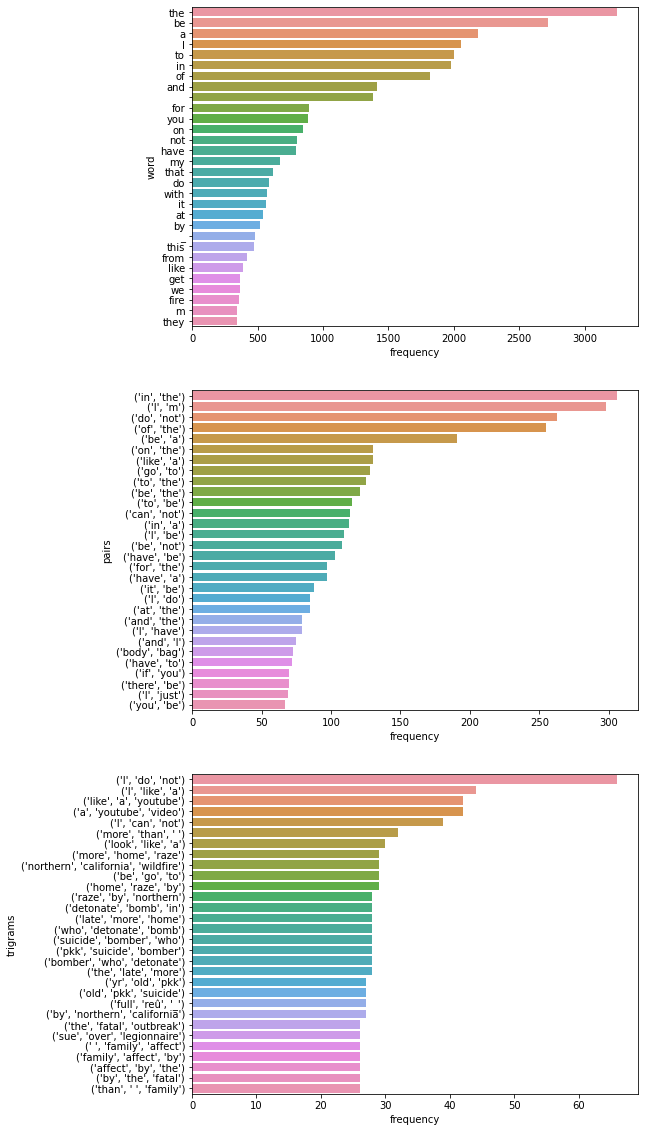

In [22]:
# most frequently occurring words
all_tokens = [token for token_set in train_p["lema_token"] for token in token_set]
word_frequency_plot(all_tokens)

#### Findings: Most frequently occurring words are stop words

In [516]:
# train_p.to_csv("Data/clean_train_data.csv", index=False)
# test_p.to_csv("Data/clean_test_data.csv", index=False)

## TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
train_vec_df = pd.read_csv("Data/clean_train_data.csv")
test_vec_df = pd.read_csv("Data/clean_test_data.csv")

In [25]:
train_vec_df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,clean_text,token,lema_token
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1,our deeds are the reason of this earthquake ma...,"['our', 'deeds', 'are', 'the', 'reason', 'of',...","['our', 'deed', 'be', 'the', 'reason', 'of', '..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0,forest fire near la ronge sask canada,"['forest', 'fire', 'near', 'la', 'ronge', 'sas...","['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0,all residents asked to shelter in place are be...,"['all', 'residents', 'asked', 'to', 'shelter',...","['all', 'resident', 'ask', 'to', 'shelter', 'i..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0,people receive wildfires evacuation orders in ...,"['people', 'receive', 'wildfires', 'evacuation...","['people', 'receive', 'wildfire', 'evacuation'..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0,just got sent this photo from ruby alaska as s...,"['just', 'got', 'sent', 'this', 'photo', 'from...","['just', 'got', 'send', 'this', 'photo', 'from..."


In [518]:
test_vec_df.head()

,id,keyword,location,text,clean_text,token,lema_token
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,"['just', 'happened', 'a', 'terrible', 'car', '...","['just', 'happen', 'a', 'terrible', 'car', 'cr..."
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...,"['heard', 'about', 'earthquake', 'is', 'differ...","['hear', 'about', 'earthquake', 'be', 'differe..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"['there', 'is', 'a', 'forest', 'fire', 'at', '...","['there', 'be', 'a', 'forest', 'fire', 'at', '..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,"['apocalypse', 'lighting', 'spokane', 'wildfir...","['apocalypse', 'lighting', 'spokane', 'wildfire']"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan,"['typhoon', 'soudelor', 'kills', 'in', 'china'...","['typhoon', 'soudelor', 'kill', ' ', 'in', 'ch..."


In [26]:
print(train_vec_df[train_vec_df["clean_text"].isnull()])
print(test_vec_df[test_vec_df["clean_text"].isnull()])

Empty DataFrame
Columns: [id, keyword, location, text, target, char_counts, word_counts, avg_wordlength, stopwords_counts, hashtag_counts, mentions_counts, digits_counts, uppercase_counts, clean_text, token, lema_token]
Index: []
Empty DataFrame
Columns: [id, keyword, location, text, clean_text, token, lema_token]
Index: []


#### Remove the NaN record

In [277]:
# test_vec_df2 = test_vec_df.drop([13])

In [278]:
# test_vec_df2[test_vec_df2["nostopwrd_text"].isnull()]

,id,keyword,location,text,clean_text,token,lema_text,no_stpwrd_clean_text,nostopwrd_text


#### feature creation

In [27]:
vectorizer_train = TfidfVectorizer(max_features=5000)
vec_trn = vectorizer_train.fit_transform(train_vec_df["clean_text"])
vectorizer_test = TfidfVectorizer(max_features=5000)
vec_tst = vectorizer_test.fit_transform(test_vec_df["clean_text"])

In [28]:
print(vec_trn)

  (0, 100)	0.23119111715334206
  (0, 4669)	0.25428390217667085
  (0, 1637)	0.46104209977490257
  (0, 101)	0.40373935369520797
  (0, 2646)	0.28600962195369395
  (0, 1310)	0.31979234802403234
  (0, 4357)	0.19877220613250143
  (0, 3050)	0.1321435166136394
  (0, 3473)	0.36208982525736255
  (0, 4317)	0.1121395342685826
  (0, 219)	0.20892363951533544
  (0, 3125)	0.27919657678468107
  (1, 647)	0.5415775666288416
  (1, 2393)	0.48539194468681274
  (1, 2955)	0.4322803224810965
  (1, 1567)	0.32697848161649207
  (1, 1633)	0.4210786087097627
  (2, 1445)	0.22544157511974228
  (2, 3115)	0.23449308867441868
  (2, 3110)	0.1466087101205994
  (2, 1415)	0.19022652089868095
  (2, 3121)	0.1990647210962836
  (2, 2994)	0.14036793996924066
  (2, 3060)	0.24725048050878307
  (2, 609)	0.11639704817453841
  :	:
  (7611, 4178)	0.2932904430457385
  (7611, 1321)	0.6063142428136519
  (7611, 866)	0.21183791797676066
  (7611, 4370)	0.27938414094546643
  (7611, 2244)	0.2457444821230194
  (7611, 61)	0.15065256027758123
  

#### Note:
Test set does not have labels, which means we cannot measure model performance on test set. Thus we will use train set as train-test set.

In [29]:
X_train = vec_trn.toarray()
y_train = train_vec_df["target"].to_numpy()
X_test = vec_tst.toarray()

In [30]:
print("X_train shape: {}; y_train shape: {}; X_test shape: {}".format(X_train.shape, y_train.shape, X_test.shape))

X_train shape: (7613, 5000); y_train shape: (7613,); X_test shape: (3263, 5000)


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train) # random state: random state of sampling

In [33]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(6090, 5000)
(1523, 5000)
(6090,)
(1523,)


In [34]:
from collections import Counter
print(Counter(y_train2))
print(Counter(y_test2))
print("ratio of target classes in train set(0/1): ", Counter(y_train2)[0]/Counter(y_train2)[1])
print("ratio of target classes in test set(0/1): ", Counter(y_test2)[0]/Counter(y_test2)[1])

Counter({0: 3473, 1: 2617})
Counter({0: 869, 1: 654})
ratio of target classes in train set(0/1):  1.327092090179595
ratio of target classes in test set(0/1):  1.3287461773700306


Cool, almost balanced set!

## Model training using Multinomial Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
def run_MultNB(clf, X_train, X_test, y_train, y_test):
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def run_MultNB_kfold(clf, X_train, y_train, n_splits=10, verbose=0):
    kfold_val = KFold(n_splits=n_splits)
    result = cross_val_score(clf, X_train, y_train, cv=kfold_val, verbose=verbose)
    print(result)
    print("mean accuracy: ", np.mean(result))

In [37]:
# Hold-out validation
mnb_clf = MultinomialNB()
run_MultNB(mnb_clf, X_train2, X_test2, y_train2, y_test2)

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       869
           1       0.86      0.67      0.75       654

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.82      0.81      0.80      1523



In [38]:
# K-fold cross validation
mnb_clf2 = MultinomialNB()
run_MultNB_kfold(mnb_clf2, X_train, y_train)

[0.77165354 0.75590551 0.79265092 0.74770039 0.75952694 0.73324573
 0.73981603 0.76215506 0.77529566 0.79894875]
mean accuracy:  0.7636898541427393


## Model training using Linear SVM

In [39]:
from sklearn.svm import LinearSVC

In [40]:
def run_svm(clf, X_train, X_test, y_train, y_test):
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def run_svm_kfold(clf, X_train, y_train, n_splits=10, verbose=0):
    kfold_val = KFold(n_splits=n_splits)
    result = cross_val_score(clf, X_train, y_train, cv=kfold_val, verbose=verbose)
    print(result)
    print("mean accuracy: ", np.mean(result))

In [41]:
# Hold-out validation
svm_clf = LinearSVC(random_state=0, tol=1e-5)
run_svm(svm_clf, X_train2, X_test2, y_train2, y_test2)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.80      0.71      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [42]:
# KFold cross validation
svm_clf2 = LinearSVC(random_state=0, tol=1e-5)
run_svm_kfold(svm_clf2, X_train, y_train)

[0.75590551 0.75459318 0.75065617 0.73193167 0.70827858 0.7043364
 0.71222076 0.71222076 0.77135348 0.7542707 ]
mean accuracy:  0.7355767207811243


## Word2Vec and Linear SVM

In [546]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 11.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-4.2.0-cp39-cp39-macosx_11_0_arm64.whl size=23933179 sha256=1356be7aa25f998f5134e7d96a27c4593af706d1b26e837e4cee82a0bfb8e0d2
  Stored in directory: /Users/suvendukumarpati/Library/Caches/pip/wheels/ed/5e/79/d2997e72ba8900a820dd5870a3566779e52ee8279f71b4c799
Successfully built gensim


In [43]:
import gensim

In [44]:
# train_vec_df = pd.read_csv("Data/clean_train_data.csv")
# test_vec_df = pd.read_csv("Data/clean_test_data.csv")

In [45]:
class W2Vectorization():
    def __init__(self, df):
        """
        Input parameter:
        df: DataFrame with document "id" and "text"
        """
        self.doc_id_list = df.id
        self.doc_text = df.text
        self.window = 10
        self.min_count = 5
        self.workers = 4
        self.vector_size = 100
        
    def preprocess(self, deacc=False):
        """
        Data preprocessing
        """
        self.df_pp = self.doc_text.apply(lambda x: gensim.utils.simple_preprocess(x, deacc=deacc))
        return self.df_pp
        
    def train_model(self):
        """
        Model training
        """
        self.model = gensim.models.Word2Vec(
            sentences=self.df_pp,
            window=self.window,
            min_count=self.min_count,
            workers=self.workers,
            vector_size=self.vector_size)
        return self.model
    
    def vectorize_documents(self):
        """
        Returns a doc_id -> vector dictionary
        """
        vectors = {}
        for doc_id, text in zip(self.doc_id_list, self.df_pp):
            text = [word for word in text if word in self.model.wv]
            if len(text) == 0:
                mean = np.zeros(self.vector_size)
            else:
                mean = sum(self.model.wv[text]) / len(self.model.wv[text])
            vectors[doc_id] = [mean[i] for i in range(len(mean))]
        return vectors

In [46]:
w2v_df = train_vec_df[["id", "text"]]
w2v = W2Vectorization(w2v_df)
w2v.preprocess(deacc=True)
w2v.train_model()
w2v_vect_dict = w2v.vectorize_documents()

In [47]:
print("Number of documents: ", len(w2v_vect_dict.keys()))
print("Vector length per document: ", len(w2v_vect_dict[1]))

Number of documents:  7613
Vector length per document:  100


In [48]:
vect_items = w2v_vect_dict.values()
vect_list = list(vect_items)
X = np.array(vect_list)
y = train_vec_df["target"].to_numpy()

In [49]:
print(X.shape)
print(y.shape)

(7613, 100)
(7613,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) # random state: random state of sampling

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6090, 100)
(6090,)
(1523, 100)
(1523,)


In [52]:
w2v_svm_clf = LinearSVC(random_state=0, tol=1e-5)
run_svm(w2v_svm_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       869
           1       0.72      0.55      0.63       654

    accuracy                           0.72      1523
   macro avg       0.72      0.70      0.70      1523
weighted avg       0.72      0.72      0.71      1523



/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
